# Deasfio Final

Buscar no site: https://en.wikipedia.org/wiki/Premier_League
a tabela que mostrar os campeões (para ir direto a tabela: https://en.wikipedia.org/wiki/Premier_League#Champions) da Premier League e montar o gráfico de pizza igual à do site (Times (Club) e quantidade de campeonatos vencidos (Winners)).

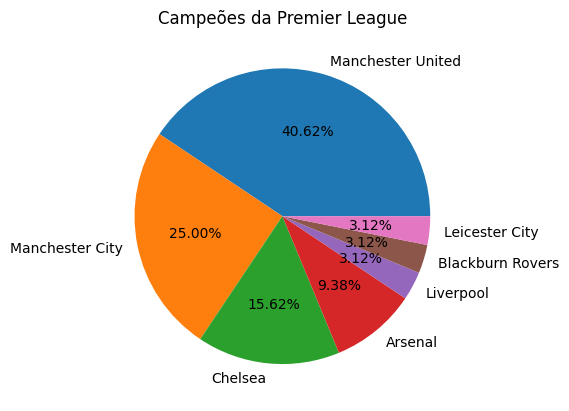

In [9]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

URL = "https://en.wikipedia.org/wiki/Premier_League"
page = requests.get(URL)

soup = BeautifulSoup(page.content, "html.parser")

tables = soup.find_all('table', class_ = 'wikitable')
# table = soup.find('table') # outra forma de 'pegar' a tag table (quando tem apenas 1 table na página, usando .find)

tbody = tables[7].tbody

rows = tbody.findAll('tr')

teams = []
wons = []

for row in rows:
    cells = row.findAll('td')

    if(len(cells) > 0):
        team = cells[0].text.strip() # Time
        won = cells[1].text.strip() # Campeão
        runners_up = cells[2].text.strip() # vice-campeão

        teams.append(team)
        wons.append(won)

        # print(team, won, runners_up)

plt.pie(wons, labels = teams, autopct = "%.2f%%") # autopct é uma string ou função usada para rotular as fatias com seus valores numéricos.
                                                  # obs.: "%.2f%%" é  formatação do valor, neste caso, do tipo float com 2 casas decimais
plt.title("Campeões da Premier League")
plt.show()